In [1]:
! pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00


In [3]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

In [4]:
from openai import OpenAI

In [78]:
class ChatBot:
    def __init__(self, protocol="You are a helpful assistant."):
        self.client = OpenAI(api_key=OPENAI_API_KEY)
        self.protocol = protocol
        self.history = [{"role": "system", "content": self.protocol}]

    def generate_response(self, prompt: str) -> str:
        self.history.append({"role": "user", "content": prompt})

        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo", # NOTE: feel free to change it to gpt-4, or gpt-4o
            messages=self.history,
            temperature=0.2
        )

        response = completion.choices[0].message.content
        self.history.append({"role": "assistant", "content": response})

        return response

    def get_history(self) -> list:
        return self.history

In [138]:
judge = ChatBot(protocol="Explain why the text is politically biased and provide feedback how to make it more neutral.")
scorer = ChatBot(protocol="Rate the text on how politically biased it is from 0 to 10. Let 0 be not biased and 10 be very biased. Only return a number.")
writer = ChatBot(
    protocol="Rewrite input text to be politically neutral by learning from the feedback.")

In [139]:
prompt = """
#Florida is "tale of what went right with President Barack Obama's health care overhaul‰Û despite GOP opposition: http://t.co/bhsAcU3Wje
"""
round = 0
rounds = []
scores = []
score = scorer.generate_response(prompt)
score = float(score)
rounds.append(round)
scores.append(score)
print("Pre-score:", score)

while True:

    if score > 1:
        feedback = judge.generate_response(prompt)
        print("-------------------------------")
        print("Round ", round+1)
        print("Feedback: ", feedback)

        prompt = writer.generate_response(
            f"Use the feedback: {feedback}"
            f"This is the current score from another judge: {left}"
            f"And rewrite the prompt so that the score is lower: {prompt}")
        print("Updated: ", prompt)
        score = scorer.generate_response(prompt)
        score = float(score)
        print("Post-score:", score)
        print("-------------------------------")

        round += 1

        rounds.append(round)
        scores.append(score)

    else:
        break

Pre-score: 8.0
-------------------------------
Round  1
Feedback:  The text is politically biased because it portrays the Affordable Care Act (commonly known as Obamacare) in a positive light by attributing the success of the healthcare overhaul to President Barack Obama, while also criticizing the GOP opposition. To make it more neutral, the tweet could be revised to provide a more balanced perspective on the Affordable Care Act and its implementation in Florida. For example:

"Florida's experience with the Affordable Care Act highlights both successes and challenges, with differing perspectives on the impact of the healthcare overhaul. Learn more: [link]"
Updated:  #Florida's experience with the Affordable Care Act showcases varying viewpoints on the impact of the healthcare overhaul, reflecting both successes and challenges. Explore more: [link]
Post-score: 2.0
-------------------------------
-------------------------------
Round  2
Feedback:  The revised tweet is much more neutral 

In [140]:
import pandas as pd

In [141]:
pd.DataFrame({"round": rounds, "how biased": scores})

,round,how biased
0,0,8.0
1,1,2.0
2,2,0.0


In [142]:
import matplotlib.pyplot as plt

In [143]:
df = pd.DataFrame({"round": rounds, "how biased": scores})

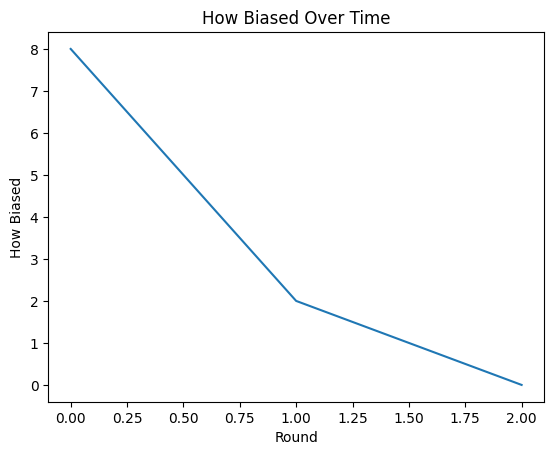

In [144]:
plt.plot(df['round'], df['how biased'])
plt.xlabel('Round')
plt.ylabel('How Biased')
plt.title('How Biased Over Time')
plt.show()